In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('outbreak_detect.csv')
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


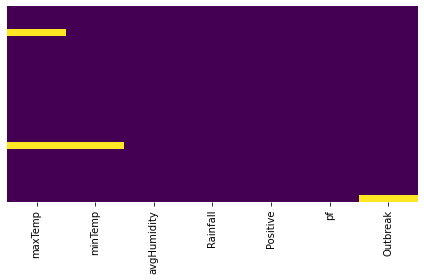

In [14]:
#Visualizing - NaN values - NULL
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [15]:
#Data Preprocessing - droping rows with NaN Values
df = df.dropna()
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes


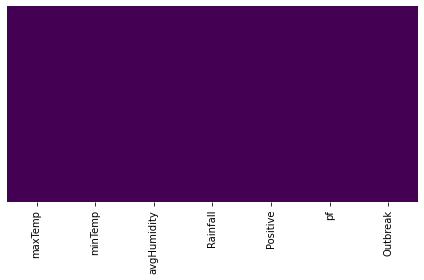

In [16]:
#Visualizing - NaN values - NULL
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)  #NaN values are removed

In [17]:
#Data Preprocessing

from sklearn import preprocessing

#Label Encoding
LE= preprocessing.LabelEncoder()

# Fitting it to our dataset

df.Outbreak = LE.fit_transform(df.Outbreak)
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1


In [18]:
#drop unrequired columns
df = df.drop('Positive',axis=1)
df = df.drop('pf',axis=1)


In [19]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1


In [20]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

# Standardizing the data apart from the Class column
data_scaled=df.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

#data_scaled = pd.DataFrame(sst.fit_transform(df.drop('Outbreak',axis=1)))

# Adding the Class column back to the DataFram

In [21]:
data_scaled.head()

,0,1,2,3
0,-1.329034,-2.078144,-1.197198,-0.684437
1,-0.196894,-0.333717,1.042817,0.918413
2,1.161674,-0.333717,-1.130392,-0.684437
3,-0.196894,0.015169,-0.567883,0.269690
4,-0.196894,1.061826,0.372082,-0.684437


In [22]:
data_scaled.columns=['maxTemp','minTemp','avgHumidity','Rainfall']

In [23]:
data_scaled.head()

,maxTemp,minTemp,avgHumidity,Rainfall
0,-1.329034,-2.078144,-1.197198,-0.684437
1,-0.196894,-0.333717,1.042817,0.918413
2,1.161674,-0.333717,-1.130392,-0.684437
3,-0.196894,0.015169,-0.567883,0.269690
4,-0.196894,1.061826,0.372082,-0.684437


In [24]:
data_scaled['Class'] = df.Outbreak

In [25]:
data_scaled

,maxTemp,minTemp,avgHumidity,Rainfall,Class
0,-1.329034,-2.078144,-1.197198,-0.684437,0.0
1,-0.196894,-0.333717,1.042817,0.918413,1.0
2,1.161674,-0.333717,-1.130392,-0.684437,0.0
3,-0.196894,0.015169,-0.567883,0.269690,NaN
4,-0.196894,1.061826,0.372082,-0.684437,0.0
5,-0.876178,0.015169,1.410252,3.675483,1.0
6,-0.423322,0.015169,0.686740,1.830415,1.0
7,-0.876178,0.015169,1.129666,0.489793,1.0
8,0.255962,0.015169,-0.952687,-0.461175,0.0
9,-0.649750,-0.333717,-0.678781,-0.684437,0.0


In [26]:
data_scaled = data_scaled[data_scaled['Class'].notna()]

In [27]:
#Loading the data
X = data_scaled.iloc[:,0:4]
Y = data_scaled.iloc[:,4:5]

In [28]:
#Splitting the dataset
#Splitting the dataset into Train & Test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=3)

In [29]:
X_train

,maxTemp,minTemp,avgHumidity,Rainfall
2,1.161674,-0.333717,-1.130392,-0.684437
20,-1.102606,-0.333717,1.279312,0.074863
16,1.161674,1.061826,-0.246544,-0.684437
13,1.840958,1.410711,0.094168,-0.194736
5,-0.876178,0.015169,1.410252,3.675483
19,-0.876178,-0.333717,0.380099,-0.161036
7,-0.876178,0.015169,1.129666,0.489793
8,0.255962,0.015169,-0.952687,-0.461175
6,-0.423322,0.015169,0.686740,1.830415
17,0.935246,0.364054,-1.345508,-0.684437


In [30]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\Areefa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [31]:
y_pred=clf.predict(X_test)

In [32]:
y_pred

array([0., 0., 1.])

In [33]:
y_test

,Class
21,1.0
14,0.0
1,1.0


In [34]:
y_train_pred=clf.predict(X_train)

In [35]:
y_train_pred


array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0.])

In [36]:
y_actual=np.array(y_train)
y_actual.flatten()

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0.])

In [37]:
#Evaluating the Model
#Train set results
data = {'y_pred': y_train_pred, 'y_actual': y_actual.flatten()}

data=pd.DataFrame(data)
data


,y_pred,y_actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,0.0,0.0
8,1.0,1.0
9,0.0,1.0


In [38]:
df1=data_scaled

In [39]:
df1

,maxTemp,minTemp,avgHumidity,Rainfall,Class
0,-1.329034,-2.078144,-1.197198,-0.684437,0.0
1,-0.196894,-0.333717,1.042817,0.918413,1.0
2,1.161674,-0.333717,-1.130392,-0.684437,0.0
4,-0.196894,1.061826,0.372082,-0.684437,0.0
5,-0.876178,0.015169,1.410252,3.675483,1.0
6,-0.423322,0.015169,0.686740,1.830415,1.0
7,-0.876178,0.015169,1.129666,0.489793,1.0
8,0.255962,0.015169,-0.952687,-0.461175,0.0
9,-0.649750,-0.333717,-0.678781,-0.684437,0.0
10,-0.196894,-2.078144,-0.551849,-0.684437,1.0


In [53]:
import math
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
W4_new = 0

# Alpha - learning rate
a = 0.03

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z
for epoch in range(30):
    
    p_preds = np.array([])
    p_pred_exps = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    error_x3 = np.array([])
    error_x4 = np.array([])
    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    W4 = W4_new
    
    # Iterating through the Df and calculating all parameters:
    for row in df1.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[1]+ W2*row[2] + W3*row[3] + W4*row[4]
        p_preds = np.append(p_preds, p_pred)
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)
        p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
        
        # Bifurcating the predicted class as per its probability to be the default class
    
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1.0)
        else:
            p_class = np.append(p_class,0.0)
            
            
    # The error in prediction
    error = p_pred_exps - df1.Class 
    
    # Pre-calculating the error*x values for all the weights:
    error_x1 = error*df1['minTemp']
    error_x2 = error*df1['maxTemp']
    error_x3 = error*df1['avgHumidity']
    error_x4 = error*df1['Rainfall']
    
    # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    W3_new = W3 - a*np.sum(error_x3)
    W4_new = W4 - a*np.sum(error_x4)

    # Adding the predicted class as a separate column to check for performance:
df1['pred_class']=p_class

# Check if any class has been mis classified

C:\Users\Areefa\AppData\Local\Temp/ipykernel_20432/2249904342.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pred_class']=p_class


In [54]:
df1

,maxTemp,minTemp,avgHumidity,Rainfall,Class,pred_class
0,-1.329034,-2.078144,-1.197198,-0.684437,0.0,0.0
1,-0.196894,-0.333717,1.042817,0.918413,1.0,1.0
2,1.161674,-0.333717,-1.130392,-0.684437,0.0,0.0
4,-0.196894,1.061826,0.372082,-0.684437,0.0,0.0
5,-0.876178,0.015169,1.410252,3.675483,1.0,1.0
6,-0.423322,0.015169,0.686740,1.830415,1.0,1.0
7,-0.876178,0.015169,1.129666,0.489793,1.0,1.0
8,0.255962,0.015169,-0.952687,-0.461175,0.0,0.0
9,-0.649750,-0.333717,-0.678781,-0.684437,0.0,0.0
10,-0.196894,-2.078144,-0.551849,-0.684437,1.0,0.0


In [55]:
# True Positives: - Model Correctly predicts the positive class
print('TP: ',df1.Class[(df1.Class==1) & (df1.pred_class==1)].count())
# False Positives: - positive outcomes that the model predicted incorrectly
print('FP: ',df1.Class[(df1.Class==0) & (df1.pred_class==1)].count())
#True Negatives: - Model Correctly predicts the Negative class
print('TN: ',df1.Class[(df1.Class==0) & (df1.pred_class==0)].count())
#False Negatives: - negative outcomes that the model predicted incorrectly
print('FN: ',df1.Class[(df1.Class==1) & (df1.pred_class==0)].count())

TP:  5
FP:  1
TN:  12
FN:  3


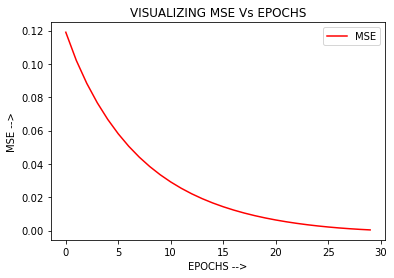

In [56]:
import matplotlib.pyplot as plt

plt.plot(MSE,label='MSE',color='red')

# Add labels and title
plt.title("VISUALIZING MSE Vs EPOCHS")
plt.xlabel("EPOCHS -->")
plt.ylabel("MSE -->")
 
plt.legend()
plt.show()